# PyTorch ToyProblem: Dog Type Classification with VGGNet - 2018.06.28

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

In [2]:
# Getting train & test dataset

transform = torchvision.transforms.Compose([
    transforms.RandomCrop(224),
    transforms.ToTensor()
])

rootdir = './data/imagenet/' # All data are from ImageNet: http://image-net.org/ 
train_dir = rootdir + 'train/' # Around 1000 data on each label
test_dir = rootdir + 'test/' # Around 200 data on each label

composer = [
    transforms.Resize(224),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])    
]

train_dataset = torchvision.datasets.ImageFolder(
    train_dir,
    transforms.Compose(composer)
)

test_dataset = torchvision.datasets.ImageFolder(
    test_dir,
    transforms.Compose(composer)
)

batch_size = 20
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=4)

Label for image 1 = 1
Label for image 2 = 4
Label for image 3 = 2
Label for image 4 = 2
Label for image 5 = 1
Label for image 6 = 4
Label for image 7 = 1
Label for image 8 = 1
Label for image 9 = 1


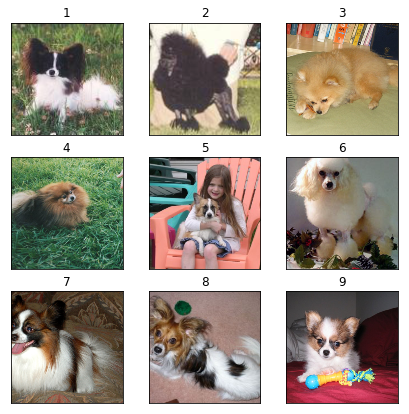

In [3]:
# Some simple visualization

plt.subplots(figsize=(7,7))
for i in range(9):
    pickup = np.random.randint(0,len(train_dataset))
    plt.subplot(3,3,i+1)
    plt.title(i+1)
    plt.xticks([])
    plt.yticks([])
    print("Label for image %d = %d" % (i+1, train_dataset[pickup][1]))
    plt.imshow(np.transpose(train_dataset[pickup][0] / 2 + 0.5, (1,2,0)))

In [4]:
# Device setup

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [5]:
# Defining VGGNet

net = torchvision.models.vgg11(pretrained=True)
net.fc = nn.Linear(512, 5) 
net.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (16): Conv2d(512, 512, kern

In [6]:
# Defining Loss function & Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=0.005)

In [7]:
# Training (Validation will be added on next self-study iteration)

tqdm.monitor_interval = 0
epochs = 10
for epoch in tqdm(range(epochs)):
    print('Epoch %d' % epoch)
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs).to(device)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if i % 10 == 0:
            print('%d data processed. loss = %f' % (i * batch_size, loss))
print('Finished training.')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0
0 data processed. loss = 17.378748
200 data processed. loss = 2.915602
400 data processed. loss = 1.308446
600 data processed. loss = 1.982088
800 data processed. loss = 1.772113
1000 data processed. loss = 1.761325
1200 data processed. loss = 1.518368
1400 data processed. loss = 1.718750
1600 data processed. loss = 1.225960
1800 data processed. loss = 1.123445
2000 data processed. loss = 0.999251
2200 data processed. loss = 0.933182
2400 data processed. loss = 1.409710
2600 data processed. loss = 0.819867
2800 data processed. loss = 0.782346
3000 data processed. loss = 0.958647
3200 data processed. loss = 0.809245
3400 data processed. loss = 0.960083
3600 data processed. loss = 0.863042
3800 data processed. loss = 1.257523
4000 data processed. loss = 0.565897
4200 data processed. loss = 0.763418
4400 data processed. loss = 0.530849
4600 data processed. loss = 0.637282
4800 data processed. loss = 0.655009
5000 data processed. loss = 0.823040
5200 data processed. loss = 0.937333

 10%|█         | 1/10 [00:53<08:04, 53.79s/it]

Epoch 1
0 data processed. loss = 0.365226
200 data processed. loss = 0.511292
400 data processed. loss = 0.556123
600 data processed. loss = 0.624718
800 data processed. loss = 0.332809
1000 data processed. loss = 0.423004
1200 data processed. loss = 0.336716
1400 data processed. loss = 0.557692
1600 data processed. loss = 0.717576
1800 data processed. loss = 0.333842
2000 data processed. loss = 0.124166
2200 data processed. loss = 0.208350
2400 data processed. loss = 0.153150
2600 data processed. loss = 0.483570
2800 data processed. loss = 0.482162
3000 data processed. loss = 0.620543
3200 data processed. loss = 0.311982
3400 data processed. loss = 0.253122
3600 data processed. loss = 0.151293
3800 data processed. loss = 0.237091
4000 data processed. loss = 0.150018
4200 data processed. loss = 0.400359
4400 data processed. loss = 0.605967
4600 data processed. loss = 0.228559
4800 data processed. loss = 0.218522
5000 data processed. loss = 0.112539
5200 data processed. loss = 0.373552


 20%|██        | 2/10 [01:47<07:11, 53.89s/it]

Epoch 2
0 data processed. loss = 0.068875
200 data processed. loss = 0.154357
400 data processed. loss = 0.151320
600 data processed. loss = 0.143773
800 data processed. loss = 0.210853
1000 data processed. loss = 0.319558
1200 data processed. loss = 0.027824
1400 data processed. loss = 0.143891
1600 data processed. loss = 0.563301
1800 data processed. loss = 0.138847
2000 data processed. loss = 0.070372
2200 data processed. loss = 0.330304
2400 data processed. loss = 0.339628
2600 data processed. loss = 0.090860
2800 data processed. loss = 0.519460
3000 data processed. loss = 0.553008
3200 data processed. loss = 0.063452
3400 data processed. loss = 0.213817
3600 data processed. loss = 0.218591
3800 data processed. loss = 0.199536
4000 data processed. loss = 0.139906
4200 data processed. loss = 0.130904
4400 data processed. loss = 0.156074
4600 data processed. loss = 0.162722
4800 data processed. loss = 0.119039
5000 data processed. loss = 0.232695
5200 data processed. loss = 0.223893


 30%|███       | 3/10 [02:41<06:17, 53.97s/it]

Epoch 3
0 data processed. loss = 0.173028
200 data processed. loss = 0.490921
400 data processed. loss = 0.179636
600 data processed. loss = 0.204199
800 data processed. loss = 0.062400
1000 data processed. loss = 0.769927
1200 data processed. loss = 0.134348
1400 data processed. loss = 0.404356
1600 data processed. loss = 0.341758
1800 data processed. loss = 0.157286
2000 data processed. loss = 0.032998
2200 data processed. loss = 0.026828
2400 data processed. loss = 0.045201
2600 data processed. loss = 0.249918
2800 data processed. loss = 0.213686
3000 data processed. loss = 0.128315
3200 data processed. loss = 0.142905
3400 data processed. loss = 0.187841
3600 data processed. loss = 0.272167
3800 data processed. loss = 0.115530
4000 data processed. loss = 0.142249
4200 data processed. loss = 0.014620
4400 data processed. loss = 0.132559
4600 data processed. loss = 0.253801
4800 data processed. loss = 0.138122
5000 data processed. loss = 0.173837
5200 data processed. loss = 0.067978


 40%|████      | 4/10 [03:36<05:24, 54.02s/it]

Epoch 4
0 data processed. loss = 0.234459
200 data processed. loss = 0.122188
400 data processed. loss = 0.087635
600 data processed. loss = 0.177042
800 data processed. loss = 0.103653
1000 data processed. loss = 0.165989
1200 data processed. loss = 0.050602
1400 data processed. loss = 0.047843
1600 data processed. loss = 0.136080
1800 data processed. loss = 0.116954
2000 data processed. loss = 0.022250
2200 data processed. loss = 0.560717
2400 data processed. loss = 0.065512
2600 data processed. loss = 0.067756
2800 data processed. loss = 0.186389
3000 data processed. loss = 0.133391
3200 data processed. loss = 0.118780
3400 data processed. loss = 0.188045
3600 data processed. loss = 0.148028
3800 data processed. loss = 0.074970
4000 data processed. loss = 0.018244
4200 data processed. loss = 0.115783
4400 data processed. loss = 0.085113
4600 data processed. loss = 0.155908
4800 data processed. loss = 0.345681
5000 data processed. loss = 0.047405
5200 data processed. loss = 0.237246


 50%|█████     | 5/10 [04:30<04:30, 54.07s/it]

Epoch 5
0 data processed. loss = 0.107169
200 data processed. loss = 0.133598
400 data processed. loss = 0.051038
600 data processed. loss = 0.132789
800 data processed. loss = 0.059448
1000 data processed. loss = 0.119005
1200 data processed. loss = 0.034589
1400 data processed. loss = 0.032632
1600 data processed. loss = 0.037031
1800 data processed. loss = 0.417575
2000 data processed. loss = 0.014552
2200 data processed. loss = 0.073214
2400 data processed. loss = 0.107031
2600 data processed. loss = 0.132316
2800 data processed. loss = 0.031073
3000 data processed. loss = 0.181216
3200 data processed. loss = 0.014742
3400 data processed. loss = 0.056776
3600 data processed. loss = 0.009352
3800 data processed. loss = 0.019852
4000 data processed. loss = 0.099374
4200 data processed. loss = 0.010751
4400 data processed. loss = 0.088896
4600 data processed. loss = 0.218894
4800 data processed. loss = 0.026615
5000 data processed. loss = 0.027160
5200 data processed. loss = 0.104847


 60%|██████    | 6/10 [05:24<03:36, 54.09s/it]

Epoch 6
0 data processed. loss = 0.060706
200 data processed. loss = 0.352798
400 data processed. loss = 0.016646
600 data processed. loss = 0.153928
800 data processed. loss = 0.013557
1000 data processed. loss = 0.159433
1200 data processed. loss = 0.130207
1400 data processed. loss = 0.072553
1600 data processed. loss = 0.006286
1800 data processed. loss = 0.018313
2000 data processed. loss = 0.002646
2200 data processed. loss = 0.013549
2400 data processed. loss = 0.193109
2600 data processed. loss = 0.120987
2800 data processed. loss = 0.024773
3000 data processed. loss = 0.120954
3200 data processed. loss = 0.002768
3400 data processed. loss = 0.131406
3600 data processed. loss = 0.084878
3800 data processed. loss = 0.226500
4000 data processed. loss = 0.068223
4200 data processed. loss = 0.013003
4400 data processed. loss = 0.086672
4600 data processed. loss = 0.024188
4800 data processed. loss = 0.026253
5000 data processed. loss = 0.011222
5200 data processed. loss = 0.194890


 70%|███████   | 7/10 [06:18<02:42, 54.13s/it]

Epoch 7
0 data processed. loss = 0.005043
200 data processed. loss = 0.087040
400 data processed. loss = 0.016366
600 data processed. loss = 0.508847
800 data processed. loss = 0.035376
1000 data processed. loss = 0.092964
1200 data processed. loss = 0.057731
1400 data processed. loss = 0.063047
1600 data processed. loss = 0.022130
1800 data processed. loss = 0.017446
2000 data processed. loss = 0.166695
2200 data processed. loss = 0.014241
2400 data processed. loss = 0.124501
2600 data processed. loss = 0.153941
2800 data processed. loss = 0.017388
3000 data processed. loss = 0.024963
3200 data processed. loss = 0.014694
3400 data processed. loss = 0.074287
3600 data processed. loss = 0.020428
3800 data processed. loss = 0.053052
4000 data processed. loss = 0.211001
4200 data processed. loss = 0.003138
4400 data processed. loss = 0.012282
4600 data processed. loss = 0.012320
4800 data processed. loss = 0.048428
5000 data processed. loss = 0.087539
5200 data processed. loss = 0.015415


 80%|████████  | 8/10 [07:13<01:48, 54.15s/it]

Epoch 8
0 data processed. loss = 0.015373
200 data processed. loss = 0.560638
400 data processed. loss = 0.005075
600 data processed. loss = 0.002538
800 data processed. loss = 0.117810
1000 data processed. loss = 0.013704
1200 data processed. loss = 0.002118
1400 data processed. loss = 0.046475
1600 data processed. loss = 0.031321
1800 data processed. loss = 0.079794
2000 data processed. loss = 0.007515
2200 data processed. loss = 0.046176
2400 data processed. loss = 0.046932
2600 data processed. loss = 0.029948
2800 data processed. loss = 0.026084
3000 data processed. loss = 0.012001
3200 data processed. loss = 0.005107
3400 data processed. loss = 0.017304
3600 data processed. loss = 0.072810
3800 data processed. loss = 0.009193
4000 data processed. loss = 0.101284
4200 data processed. loss = 0.005132
4400 data processed. loss = 0.012027
4600 data processed. loss = 0.006231
4800 data processed. loss = 0.047092
5000 data processed. loss = 0.022985
5200 data processed. loss = 0.062146


 90%|█████████ | 9/10 [08:07<00:54, 54.16s/it]

Epoch 9
0 data processed. loss = 0.019906
200 data processed. loss = 0.014913
400 data processed. loss = 0.034859
600 data processed. loss = 0.012199
800 data processed. loss = 0.174343
1000 data processed. loss = 0.014855
1200 data processed. loss = 0.004106
1400 data processed. loss = 0.019714
1600 data processed. loss = 0.034114
1800 data processed. loss = 0.002411
2000 data processed. loss = 0.006630
2200 data processed. loss = 0.011340
2400 data processed. loss = 0.056955
2600 data processed. loss = 0.116628
2800 data processed. loss = 0.064678
3000 data processed. loss = 0.039930
3200 data processed. loss = 0.300974
3400 data processed. loss = 0.051951
3600 data processed. loss = 0.089013
3800 data processed. loss = 0.010520
4000 data processed. loss = 0.017148
4200 data processed. loss = 0.005931
4400 data processed. loss = 0.016090
4600 data processed. loss = 0.012524
4800 data processed. loss = 0.011619
5000 data processed. loss = 0.040970
5200 data processed. loss = 0.170384


100%|██████████| 10/10 [09:01<00:00, 54.19s/it]

Finished training.


In [8]:
# Testing

correct = 0
total = 0
with torch.no_grad():
    for i, data in tqdm(enumerate(test_loader)):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, prediction = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (prediction == labels).sum().item()
        
print('Accuracy for the test images: %d %%' % (100 * correct / total))

57it [00:03, 17.80it/s]

Accuracy for the test images: 92 %
